In [ ]:
import time
!pip install scipy
!pip install -U scikit-learn
!pip install wittgenstein
!pip install sklearn-evaluation
!pip install seaborn

In [176]:
#Disable warning of Ripper implementation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import sklearn
import wittgenstein as lw
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree, svm
from sklearn_evaluation import plot
import seaborn as sns
import time

In [2]:
data = arff.loadarff('ionosphere.arff')
df_iono = pd.DataFrame(data[0])

data = arff.loadarff('diabetes.arff')
df_diabe = pd.DataFrame(data[0])

data = arff.loadarff('vehicle.arff')
df_Vehicle = pd.DataFrame(data[0])

data = arff.loadarff('vowel.arff')
df_vowel = pd.DataFrame(data[0])

data = arff.loadarff('tae.arff')
df_tae = pd.DataFrame(data[0])

data = arff.loadarff('sonar.arff')
df_sonar = pd.DataFrame(data[0])

data = arff.loadarff('spambase.arff')
df_spambase = pd.DataFrame(data[0])

data = arff.loadarff('page_blocks.arff')
df_page = pd.DataFrame(data[0])

data = arff.loadarff('iris.arff')
df_iris = pd.DataFrame(data[0])

data = arff.loadarff('letter.arff')
df_letter = pd.DataFrame(data[0])

In [3]:
# Changing the last categorical class value into a numerical value
df_iono['class'] = pd.factorize(df_iono['class'])[0]
df_iono.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [4]:
# Changing the last categorical class value into a numerical value
df_diabe['class'] = pd.factorize(df_diabe['class'])[0]
df_diabe.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,1
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0


In [5]:
# Changing the last categorical class value into a numerical value
df_Vehicle['Class'] = pd.factorize(df_Vehicle['Class'])[0]
df_Vehicle.head()

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,Class
0,85.0,45.0,80.0,154.0,64.0,9.0,147.0,45.0,19.0,148.0,169.0,324.0,174.0,71.0,1.0,4.0,188.0,199.0,0
1,93.0,35.0,78.0,162.0,60.0,8.0,150.0,45.0,19.0,125.0,172.0,331.0,137.0,67.0,2.0,33.0,191.0,198.0,1
2,108.0,49.0,109.0,204.0,61.0,11.0,212.0,31.0,24.0,159.0,229.0,665.0,215.0,71.0,16.0,11.0,190.0,199.0,1
3,93.0,40.0,73.0,139.0,58.0,6.0,136.0,49.0,18.0,138.0,166.0,275.0,137.0,73.0,0.0,0.0,187.0,188.0,0
4,100.0,58.0,109.0,230.0,70.0,11.0,226.0,30.0,25.0,182.0,234.0,752.0,207.0,72.0,0.0,13.0,187.0,198.0,1


In [6]:
# Changing the last categorical class value into a numerical value
df_vowel['Class'] = pd.factorize(df_vowel['Class'])[0]
df_vowel.head()

,TT,SpeakerNumber,Sex,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,0.0,0.0,0.0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,0
1,0.0,0.0,0.0,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,1
2,0.0,0.0,0.0,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,1
3,0.0,0.0,0.0,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,1
4,0.0,0.0,0.0,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,1


In [7]:
# Changing the last categorical class value into a numerical value
df_tae['Class_attribute'] = pd.factorize(df_tae['Class_attribute'])[0]
df_tae.head()

,Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
0,b'1',23.0,3.0,b'1',19.0,0
1,b'2',15.0,3.0,b'1',17.0,0
2,b'1',23.0,3.0,b'2',49.0,0
3,b'1',5.0,2.0,b'2',33.0,0
4,b'2',7.0,11.0,b'2',55.0,0


In [8]:
# Changing the last categorical class value into a numerical value
df_sonar['Class'] = pd.factorize(df_sonar['Class'])[0]
df_sonar.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [9]:
# Changing the last categorical class value into a numerical value
df_spambase['class'] = pd.factorize(df_spambase['class'])[0]
df_spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,0


In [10]:
# Changing the last categorical class value into a numerical value
df_page['Class'] = pd.factorize(df_page['Class'])[0]
df_page.head()

,Height,Lenght,Area,Eccen,P_black,P_and,Mean_tr,Blackpix,Blackand,Wb_trans,Class
0,5.0,7.0,35.0,1.400,0.400,0.657,2.33,14.0,23.0,6.0,0
1,6.0,7.0,42.0,1.167,0.429,0.881,3.60,18.0,37.0,5.0,0
2,6.0,18.0,108.0,3.000,0.287,0.741,4.43,31.0,80.0,7.0,0
3,5.0,7.0,35.0,1.400,0.371,0.743,4.33,13.0,26.0,3.0,0
4,6.0,3.0,18.0,500.000,0.500,0.944,2.25,9.0,17.0,4.0,0


In [11]:
# Changing the last categorical class value into a numerical value
df_iris['class'] = pd.factorize(df_iris['class'])[0]
df_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# Changing the last categorical class value into a numerical value
df_letter['class'] = pd.factorize(df_letter['class'])[0]
df_letter.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,0
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,1
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,2
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,3
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,3


In [15]:
trainIono, testIono = train_test_split(df_iono, test_size=.33)

trainDiabe, testDiabe = train_test_split(df_diabe, test_size=.33)

trainVehicle, testVehicle = train_test_split(df_Vehicle, test_size=.33)

trainVowel, testVowel = train_test_split(df_vowel, test_size=.33)

trainTae, testTae = train_test_split(df_tae, test_size=.33)

trainSonar, testSonar = train_test_split(df_sonar, test_size=.33)

trainSpambase, testSpambase = train_test_split(df_spambase, test_size=.33)

trainPage, testPage = train_test_split(df_page, test_size=.33)

trainIris, testIris = train_test_split(df_iris, test_size=.33)

trainLetter, testLetter = train_test_split(df_letter, test_size=.33)

# Ripper vs Decision trees

In [16]:
X_trainIono = trainIono.drop('class', axis=1)
y_trainIono = trainIono['class']
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(X_trainIono, y_trainIono)
# Print model
print(ripper_clf.out_model())

[[a27=>0.97 ^ a01=0.0] V
[a05=<0.0] V
[a18=<-0.75] V
[a31=-0.55-0.0 ^ a05=0.0-0.45] V
[a03=0.54-0.74 ^ a30=-0.39--0.21] V
[a03=<0.0]]
None


[Text(0.43333333333333335, 0.95, 'x[4] <= 0.041\ngini = 0.478\nsamples = 235\nvalue = [142, 93]'),
 Text(0.36666666666666664, 0.85, 'gini = 0.0\nsamples = 52\nvalue = [0, 52]'),
 Text(0.5, 0.85, 'x[26] <= 1.0\ngini = 0.348\nsamples = 183\nvalue = [142, 41]'),
 Text(0.3333333333333333, 0.75, 'x[2] <= 0.437\ngini = 0.141\nsamples = 144\nvalue = [133, 11]'),
 Text(0.2, 0.65, 'x[23] <= -0.001\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.13333333333333333, 0.55, 'x[2] <= -0.403\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.06666666666666667, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.45, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.26666666666666666, 0.55, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4666666666666667, 0.65, 'x[33] <= 0.951\ngini = 0.085\nsamples = 135\nvalue = [129, 6]'),
 Text(0.4, 0.55, 'x[15] <= -0.918\ngini = 0.058\nsamples = 133\nvalue = [129, 4]'),
 Text(0.3333333333333333, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1

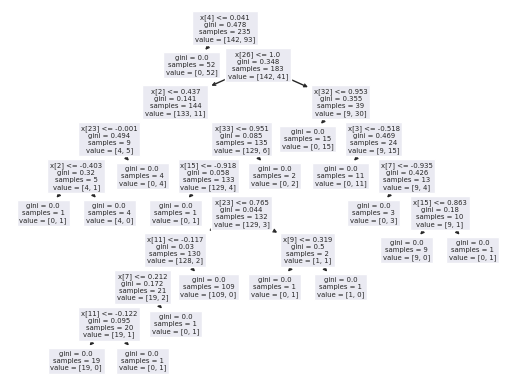

In [17]:
tree_cf = tree.DecisionTreeClassifier()
tree_cf.fit(X_trainIono,y_trainIono)
tree.plot_tree(tree_cf)

In [18]:
# Score
X_testIono = testIono.drop('class', axis=1)
y_testIono = testIono['class']
print(ripper_clf.score(X_testIono, y_testIono))

0.9051724137931034


In [19]:
print(tree_cf.score(X_testIono, y_testIono))

0.8879310344827587


In [20]:
X_trainDiabe = trainDiabe.drop('class', axis=1)
y_trainDiabe = trainDiabe['class']
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(X_trainDiabe, y_trainDiabe)
# Print model
print(ripper_clf.out_model())

[[age=<22.0] V
[insu=18.0-69.4]]
None


[Text(0.6612946428571429, 0.975, 'x[1] <= 154.5\ngini = 0.45\nsamples = 514\nvalue = [176, 338]'),
 Text(0.40830357142857143, 0.925, 'x[7] <= 30.5\ngini = 0.386\nsamples = 437\nvalue = [114, 323]'),
 Text(0.27035714285714285, 0.875, 'x[5] <= 41.8\ngini = 0.238\nsamples = 254\nvalue = [35, 219]'),
 Text(0.15214285714285714, 0.825, 'x[1] <= 103.5\ngini = 0.192\nsamples = 233\nvalue = [25, 208]'),
 Text(0.07428571428571429, 0.775, 'x[6] <= 1.28\ngini = 0.069\nsamples = 112\nvalue = [4, 108]'),
 Text(0.045714285714285714, 0.725, 'x[5] <= 37.3\ngini = 0.053\nsamples = 110\nvalue = [3, 107]'),
 Text(0.022857142857142857, 0.675, 'x[3] <= 31.5\ngini = 0.021\nsamples = 96\nvalue = [1, 95]'),
 Text(0.011428571428571429, 0.625, 'gini = 0.0\nsamples = 85\nvalue = [0, 85]'),
 Text(0.03428571428571429, 0.625, 'x[2] <= 55.0\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.022857142857142857, 0.575, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.045714285714285714, 0.575, 'gini = 0.0\nsamp

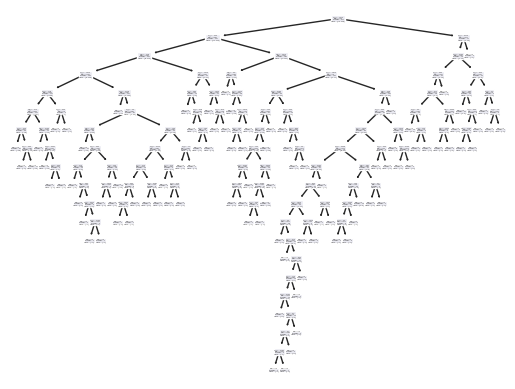

In [21]:
tree_cf = tree.DecisionTreeClassifier()
tree_cf.fit(X_trainDiabe,y_trainDiabe)
tree.plot_tree(tree_cf)

In [22]:
# Score
X_testDiabe = testDiabe.drop('class', axis=1)
y_testDiabe = testDiabe['class']
print(ripper_clf.score(X_testDiabe, y_testDiabe))

0.5787401574803149


In [23]:
print(tree_cf.score(X_testDiabe, y_testDiabe))

0.7598425196850394


In [24]:
X_trainVehicle = trainVehicle.drop('Class', axis=1)
y_trainVehicle = trainVehicle['Class']
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(X_trainVehicle, y_trainVehicle)
# Print model
print(ripper_clf.out_model())

[[Elongatedness=<31.0] V
[Minor_variance=405.0-525.0] V
[Praxis_rectangular=18.0-19.0 ^ Max_length_aspect_ratio=6.0-7.0] V
[Scatter_ratio=186.0-206.0] V
[Max_length_aspect_ratio=<6.0 ^ Praxis_rectangular=18.0-19.0] V
[Length_rectangular=<129.0 ^ Scatter_ratio=132.0-140.0] V
[Major_kurtosis=<181.0 ^ Praxis_rectangular=18.0-19.0] V
[Major_variance=177.5-189.0 ^ Scatter_ratio=157.0-164.0] V
[Scatter_ratio=206.0-218.0] V
[Length_rectangular=<129.0 ^ Minor_kurtosis=>25.0] V
[Max_length_aspect_ratio=<6.0 ^ Major_variance=153.5-163.0] V
[Max_length_aspect_ratio=7.0-8.0 ^ Praxis_rectangular=18.0-19.0] V
[Length_rectangular=129.0-134.0 ^ Praxis_rectangular=19.0-20.0] V
[Max_length_aspect_ratio=6.0-7.0 ^ Distance_circularity=75.0-79.0]]
None


[Text(0.6590909090909091, 0.95, 'x[7] <= 41.5\ngini = 0.378\nsamples = 566\nvalue = [143, 423]'),
 Text(0.6287878787878788, 0.85, 'gini = 0.0\nsamples = 250\nvalue = [0, 250]'),
 Text(0.6893939393939394, 0.85, 'x[5] <= 8.5\ngini = 0.495\nsamples = 316\nvalue = [143, 173]'),
 Text(0.5, 0.75, 'x[6] <= 139.5\ngini = 0.4\nsamples = 232\nvalue = [64, 168]'),
 Text(0.3333333333333333, 0.65, 'x[9] <= 131.5\ngini = 0.479\nsamples = 98\nvalue = [59, 39]'),
 Text(0.18181818181818182, 0.55, 'x[6] <= 128.5\ngini = 0.44\nsamples = 46\nvalue = [15, 31]'),
 Text(0.15151515151515152, 0.45, 'x[9] <= 124.5\ngini = 0.494\nsamples = 27\nvalue = [15, 12]'),
 Text(0.09090909090909091, 0.35, 'x[15] <= 10.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.06060606060606061, 0.25, 'x[12] <= 124.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.030303030303030304, 0.15, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09090909090909091, 0.15, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.121

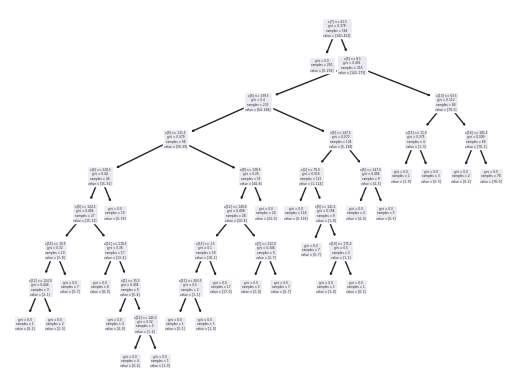

In [25]:
tree_cf = tree.DecisionTreeClassifier()
tree_cf.fit(X_trainVehicle,y_trainVehicle)
tree.plot_tree(tree_cf)

In [26]:
# Score
X_testVehicle = testVehicle.drop('Class', axis=1)
y_testVehicle = testVehicle['Class']
print(ripper_clf.score(X_testVehicle, y_testVehicle))

0.9357142857142857


In [27]:
print(tree_cf.score(X_testVehicle, y_testVehicle))

0.9357142857142857


In [28]:
X_trainVowel = trainVowel.drop('Class', axis=1)
y_trainVowel = trainVowel['Class']
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(X_trainVowel, y_trainVowel)
# Print model
print(ripper_clf.out_model())

[[F3=-0.21-0.01] V
[F3=<-0.39] V
[F1=1.55-1.87] V
[F3=0.01-0.24] V
[F3=-0.39--0.21] V
[F3=0.42-0.69 ^ TT=1.0] V
[F3=0.24-0.42] V
[F4=<-1.17] V
[F1=1.19-1.55 ^ TT=0.0] V
[F1=0.82-1.19] V
[F0=<-4.33 ^ Sex=0.0] V
[F1=1.19-1.55] V
[SpeakerNumber=5.0-7.0 ^ F8=-1.01--0.78]]
None


[Text(0.47619047619047616, 0.9166666666666666, 'x[4] <= 0.407\ngini = 0.177\nsamples = 661\nvalue = [65, 596]'),
 Text(0.16666666666666666, 0.75, 'x[6] <= 0.149\ngini = 0.416\nsamples = 78\nvalue = [55, 23]'),
 Text(0.11904761904761904, 0.5833333333333334, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.21428571428571427, 0.5833333333333334, 'x[8] <= 0.533\ngini = 0.278\nsamples = 66\nvalue = [55, 11]'),
 Text(0.09523809523809523, 0.4166666666666667, 'x[12] <= 0.853\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.047619047619047616, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[6] <= 0.832\ngini = 0.203\nsamples = 61\nvalue = [54, 7]'),
 Text(0.23809523809523808, 0.25, 'x[9] <= 0.374\ngini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.19047619047619047, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.2857142857142857, 0.

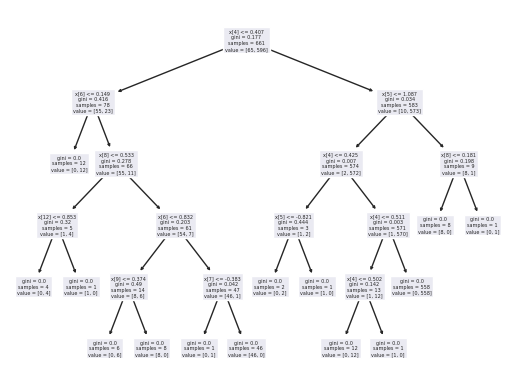

In [29]:
tree_cf = tree.DecisionTreeClassifier()
tree_cf.fit(X_trainVowel,y_trainVowel)
tree.plot_tree(tree_cf)

In [30]:
# Score
X_testVowel = testVowel.drop('Class', axis=1)
y_testVowel = testVowel['Class']
print(ripper_clf.score(X_testVowel, y_testVowel))

0.8318042813455657


In [31]:
print(tree_cf.score(X_testVowel, y_testVowel))

0.9755351681957186


# Decision trees vs SVM

In [32]:
X_trainTae = trainTae.drop('Class_attribute', axis=1)
y_trainTae = trainTae['Class_attribute']

X_testTae = testTae.drop('Class_attribute', axis=1)
y_testTae = testTae['Class_attribute']

In [33]:
X_trainSonar = trainSonar.drop('Class', axis=1)
y_trainSonar = trainSonar['Class']

X_testSonar = testSonar.drop('Class', axis=1)
y_testSonar = testSonar['Class']

In [34]:
X_trainSpambase = trainSpambase.drop('class', axis=1)
y_trainSpambase = trainSpambase['class']

X_testSpambase = testSpambase.drop('class', axis=1)
y_testSpambase = testSpambase['class']

In [35]:
X_trainPage = trainPage.drop('Class', axis=1)
y_trainPage = trainPage['Class']

X_testPage = testPage.drop('Class', axis=1)
y_testPage = testPage['Class']

In [36]:
X_trainIris = trainIris.drop('class', axis=1)
y_trainIris = trainIris['class']

X_testIris = testIris.drop('class', axis=1)
y_testIris = testIris['class']

In [37]:
X_trainLetter = trainLetter.drop('class', axis=1)
y_trainLetter = trainLetter['class']

X_testLetter = testLetter.drop('class', axis=1)
y_testLetter = testLetter['class']

In [38]:
clf_svm = svm.SVC(kernel='linear', C=1)
clf_tree = tree.DecisionTreeClassifier()
SVM_scores = []
Tree_scores = []
datasets = []

In [202]:
init = time.time()
clf_svm.fit(X_trainIono, y_trainIono)
end = time.time()
print(clf_svm.score(X_testIono, y_testIono))
SVM_scores.append(clf_svm.score(X_testIono, y_testIono) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Ionosphere")

0.8706896551724138
Tiempo para ejecutarse: 0.007992267608642578s


In [203]:
init = time.time()
clf_tree.fit(X_trainIono, y_trainIono)
end = time.time()
print(clf_tree.score(X_testIono, y_testIono))
print(f"Tiempo para ejecutarse: {end-init}s")
Tree_scores.append(clf_tree.score(X_testIono, y_testIono) * 100)

0.8448275862068966
Tiempo para ejecutarse: 0.00609135627746582s


In [204]:
init = time.time()
clf_svm.fit(X_trainDiabe, y_trainDiabe)
end = time.time()
print(clf_svm.score(X_testDiabe, y_testDiabe))
SVM_scores.append(clf_svm.score(X_testDiabe, y_testDiabe) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Diabetes")

0.7874015748031497
Tiempo para ejecutarse: 0.9718077182769775s


In [205]:
init = time.time()
clf_tree.fit(X_trainDiabe, y_trainDiabe)
end = time.time()
print(clf_tree.score(X_testDiabe, y_testDiabe))
Tree_scores.append(clf_tree.score(X_testDiabe, y_testDiabe) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.7401574803149606
Tiempo para ejecutarse: 0.0031919479370117188s


In [206]:
init = time.time()
clf_svm.fit(X_trainVowel, y_trainVowel)
end = time.time()
print(clf_svm.score(X_testVowel, y_testVowel))
SVM_scores.append(clf_svm.score(X_testVowel, y_testVowel) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Vowel")

0.9694189602446484
Tiempo para ejecutarse: 0.0054705142974853516s


In [207]:
init = time.time()
clf_tree.fit(X_trainVowel, y_trainVowel)
end = time.time()
print(clf_tree.score(X_testVowel, y_testVowel))
Tree_scores.append(clf_tree.score(X_testVowel, y_testVowel) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.9785932721712538
Tiempo para ejecutarse: 0.003883838653564453s


In [208]:
init = time.time()
clf_svm.fit(X_trainVehicle, y_trainVehicle)
end = time.time()
print(clf_svm.score(X_testVehicle, y_testVehicle))
SVM_scores.append(clf_svm.score(X_testVehicle, y_testVehicle) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Vehicle")

0.95
Tiempo para ejecutarse: 0.01756763458251953s


In [209]:
init = time.time()
clf_tree.fit(X_trainVehicle, y_trainVehicle)
end = time.time()
print(clf_tree.score(X_testVehicle, y_testVehicle))
Tree_scores.append(clf_tree.score(X_testVehicle, y_testVehicle) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.9464285714285714
Tiempo para ejecutarse: 0.0034532546997070312s


In [210]:
init = time.time()
clf_svm.fit(X_trainTae, y_trainTae)
end = time.time()
print(clf_svm.score(X_testTae, y_testTae))
SVM_scores.append(clf_svm.score(X_testTae, y_testTae) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Tae")

0.5
Tiempo para ejecutarse: 0.011527061462402344s


In [211]:
init = time.time()
clf_tree.fit(X_trainTae, y_trainTae)
end = time.time()
print(clf_tree.score(X_testTae, y_testTae))
Tree_scores.append(clf_tree.score(X_testTae, y_testTae) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.62
Tiempo para ejecutarse: 0.0027604103088378906s


In [212]:
init = time.time()
clf_svm.fit(X_trainSonar, y_trainSonar)
end = time.time()
print(clf_svm.score(X_testSonar, y_testSonar))
SVM_scores.append(clf_svm.score(X_testSonar, y_testSonar) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Sonar")

0.782608695652174
Tiempo para ejecutarse: 0.0029790401458740234s


In [213]:
init = time.time()
clf_tree.fit(X_trainSonar, y_trainSonar)
end = time.time()
print(clf_tree.score(X_testSonar, y_testSonar))
Tree_scores.append(clf_tree.score(X_testSonar, y_testSonar) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.6956521739130435
Tiempo para ejecutarse: 0.004316091537475586s


In [214]:
init = time.time()
clf_svm.fit(X_trainSpambase, y_trainSpambase)
end = time.time()
print(clf_svm.score(X_testSpambase, y_testSpambase))
SVM_scores.append(clf_svm.score(X_testSpambase, y_testSpambase) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Spambase")

0.924292297564187
Tiempo para ejecutarse: 202.114244222641s


In [215]:
init = time.time()
clf_tree.fit(X_trainSpambase, y_trainSpambase)
end = time.time()
print(clf_tree.score(X_testSpambase, y_testSpambase))
Tree_scores.append(clf_tree.score(X_testSpambase, y_testSpambase) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.9150757077024358
Tiempo para ejecutarse: 0.040943145751953125s


In [216]:
init = time.time()
clf_svm.fit(X_trainPage, y_trainPage)
end = time.time()
print(clf_svm.score(X_testPage, y_testPage))
SVM_scores.append(clf_svm.score(X_testPage, y_testPage) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Page")

0.9490586932447398
Tiempo para ejecutarse: 175.51871180534363s


In [217]:
init = time.time()
clf_tree.fit(X_trainPage, y_trainPage)
end = time.time()
print(clf_tree.score(X_testPage, y_testPage))
Tree_scores.append(clf_tree.score(X_testPage, y_testPage) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.969545957918051
Tiempo para ejecutarse: 0.02129960060119629s


In [218]:
init = time.time()
clf_svm.fit(X_trainIris, y_trainIris)
end = time.time()
print(clf_svm.score(X_testIris, y_testIris))
SVM_scores.append(clf_svm.score(X_testIris, y_testIris) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Iris")

0.96
Tiempo para ejecutarse: 0.0023767948150634766s


In [219]:
init = time.time()
clf_tree.fit(X_trainIris, y_trainIris)
end = time.time()
print(clf_tree.score(X_testIris, y_testIris))
Tree_scores.append(clf_tree.score(X_testIris, y_testIris) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.96
Tiempo para ejecutarse: 0.001500844955444336s


In [220]:
init = time.time()
clf_svm.fit(X_trainLetter, y_trainLetter)
end = time.time()
print(clf_svm.score(X_testLetter, y_testLetter))
SVM_scores.append(clf_svm.score(X_testLetter, y_testLetter) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Letter")

0.8521212121212122
Tiempo para ejecutarse: 1.638143539428711s


In [221]:
init = time.time()
clf_tree.fit(X_trainLetter, y_trainLetter)
end = time.time()
print(clf_tree.score(X_testLetter, y_testLetter))
Tree_scores.append(clf_tree.score(X_testLetter, y_testLetter) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.863030303030303
Tiempo para ejecutarse: 0.045900821685791016s


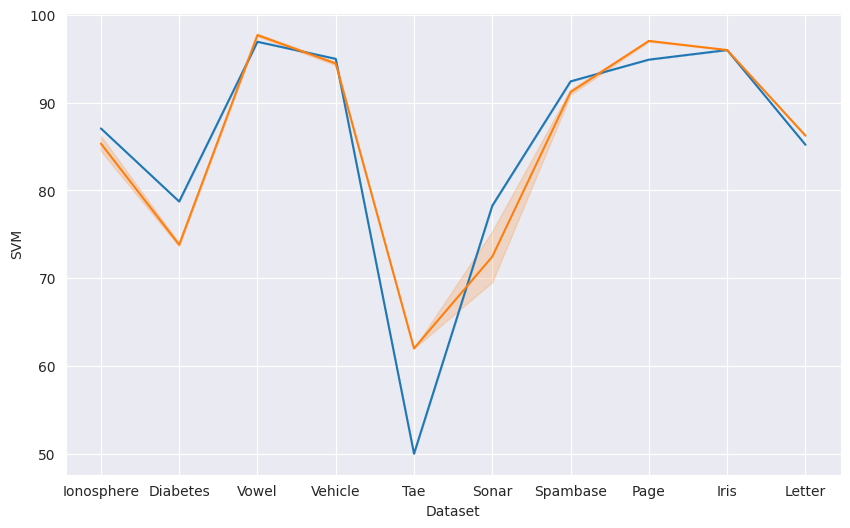

In [222]:
my_dict = dict(SVM=SVM_scores,Tree=Tree_scores,Dataset=datasets)
data = pd.DataFrame (my_dict)
fig, ax = plt.subplots(figsize=(10, 6))
ax= sns.lineplot(x='Dataset', y='SVM', data=data)
ax1 = sns.lineplot(x='Dataset', y='Tree', data=data)

## Crossvalidation

In [223]:
# Set the parameters by cross-validation
parameters = [
 {"kernel": ["rbf"], "gamma": [0.01, 0.1, 1.0], "C": [1, 10, 100, 1000]},
 {"kernel": ["linear"], "gamma": [0.01], "C": [1, 10, 100, 1000]},
]

In [224]:
from sklearn_evaluation.util import _mapping_to_tuple_pairs, _get_params_value, _sorted_map_iter, _flatten_list, \
    _group_by
import collections

import matplotlib.pyplot as plt
import numpy as np
from six import string_types

from sklearn_evaluation.plot.matplotlib.bar import BarShifter


def grid_searchSingle(cv_results_,
                change,
                subset=None,
                kind='line',
                ax=None,
                sort=True
                ):

    if change is None:
        raise ValueError(('change can\'t be None, you need to select at least'
                          ' one value to make the plot.'))

    if ax is None:
        ax = plt.gca()

    gs = collections.namedtuple(
        'grid_scores_',
        ['parameters', 'mean_validation_score', 'std_test_score'])

    grid_scores = [
        gs(p, m, s) for p, m, s in
        zip(cv_results_['params'], cv_results_['mean_test_score'],
            cv_results_['std_test_score'])
    ]

    if isinstance(change, string_types) or len(change) == 1:
        return _grid_search_singleP(grid_scores, change, subset, kind, ax, sort)
    else:
        raise ValueError('change must have length 1 or 2 or be a string')


def _grid_search_singleP(grid_scores, change, subset, kind, ax, sort):
    # the logic of this function is to group the grid scores acording
    # to certain rules and subsequently remove the elements that we are
    # not interested in, until we have only the elements that the user
    # wants to plot

    # get a set with all the parameters
    params = set(grid_scores[0].parameters.keys())

    # remove parameter to vary from the list
    # since we are not filtering on that parameter
    try:
        params.remove(change)
    except KeyError:
        raise ValueError('{} is not a valid parameter'.format(change))

    # now need need to filter out the grid_scores that the user
    # didn't select, for that we have to cases, the first one is when
    # the user explicitely selected some values
    if subset:
        # group the grid_scores based on the values the user selected
        # in subset
        groups = _group_by(grid_scores, _get_params_value(subset.keys()))
        keys = _mapping_to_tuple_pairs(subset)
        groups = {k: v for k, v in _sorted_map_iter(groups, sort) if k in keys}
        grid_scores = _flatten_list(groups.values())
        groups = _group_by(grid_scores, _get_params_value(params))
        if not groups:
            raise ValueError(('Your subset didn\'t match any data'
                              ' verify that the values are correct.'))
    # if the user didn't select any values don't filter anything
    # just group the grid_scores depending on the values they
    # have for the parameters
    else:
        groups = _group_by(grid_scores, _get_params_value(params))

    if kind == 'bar':
        change_unique = len(set([g.parameters[change] for g in grid_scores]))
        # bar shifter is just a wrapper around matplotlib's bar plot
        # to automatically calculate the left position on each bar
        bar_shifter = BarShifter(g_number=change_unique,
                                 g_size=len(groups),
                                 ax=ax)

    for params_kv, group in _sorted_map_iter(groups, sort):
        # get the x and y values for each grid_score on this group
        # also calculate the std
        x = [element.parameters[change] for element in group]
        y = [element.mean_validation_score for element in group]
        stds = [element.std_test_score for element in group]

        # take (param, value) and convert them to 'param: value'
        label = ['{}: {}'.format(*t) for t in params_kv]
        # now convert it to one string
        label = ', '.join(label)

        if kind == 'bar':
            bar_shifter(y, yerr=stds, label=label)
        elif kind == 'line':
            is_categorical = isinstance(x[0], string_types)
            if is_categorical:
                ints = range(len(x))
                ax.errorbar(ints, y, yerr=stds, label=label)
                ax.set_xticks(ints)
            else:
                ax.errorbar(x, y, yerr=stds, label=label)
                ax.set_xticks(x)

    ax.set_xticklabels(x)
    ax.set_title('Grid search results')
    ax.set_ylabel('Score')
    ax.set_xscale('log')
    ax.set_xlabel(change)
    ax.margins(0.05)
    return ax

In [225]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

# Train the SVM model
svm_model = svm.SVC()
optimal = GridSearchCV(estimator=svm_model, cv=sss, param_grid=parameters, n_jobs=-1)

In [226]:
init = time.time()
optimal.fit(X_trainIono, y_trainIono)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testIono, y_testIono)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score -> 0.9559322033898304

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.9396551724137931

Tiempo medio en ejecutarse el método: 0.009269717335700988 +- 0.0026256349790087074s
Tiempo en ejecutarse la búsqueda 1.2982633113861084s, (0.02163772185643514 min)


<AxesSubplot: >

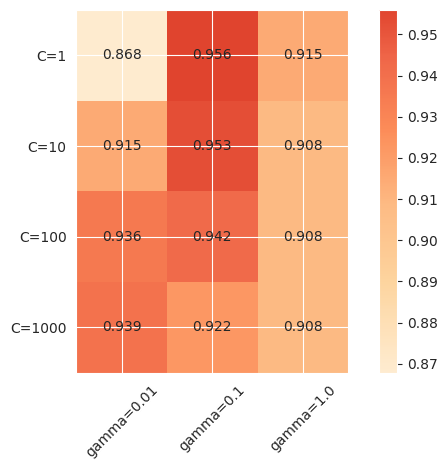

In [227]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

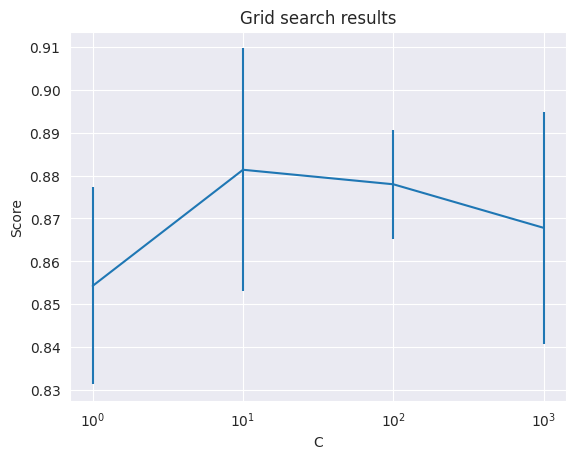

In [228]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [229]:
init = time.time()
optimal.fit(X_trainDiabe, y_trainDiabe)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testDiabe, y_testDiabe)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
Best score -> 0.7596899224806202

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.7795275590551181

Tiempo medio en ejecutarse el método: 5.551169222593307 +- 1.3115481145371903s
Tiempo en ejecutarse la búsqueda 160.91999578475952s, (2.681999929745992 min)


<AxesSubplot: >

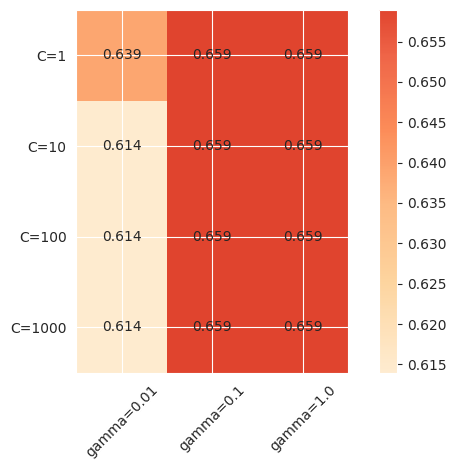

In [230]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

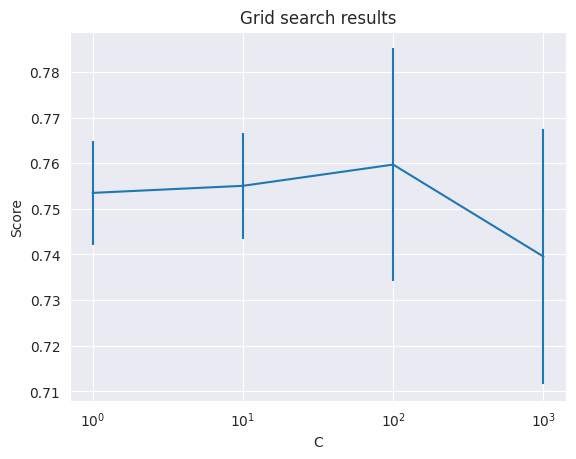

In [231]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [232]:
init = time.time()
optimal.fit(X_trainVehicle, y_trainVehicle)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testVehicle, y_testVehicle)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best score -> 0.967605633802817

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.95

Tiempo medio en ejecutarse el método: 0.02961227595806122 +- 0.02396827105274697s
Tiempo en ejecutarse la búsqueda 0.5390253067016602s, (0.008983755111694336 min)


<AxesSubplot: >

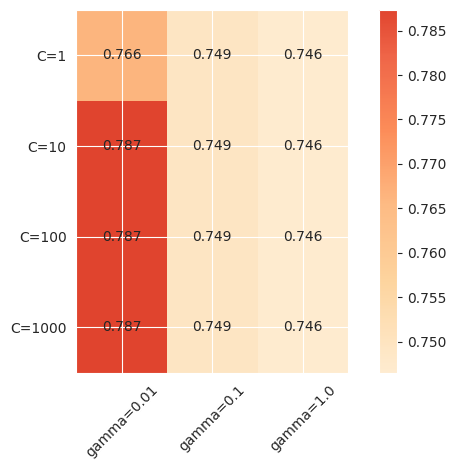

In [233]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

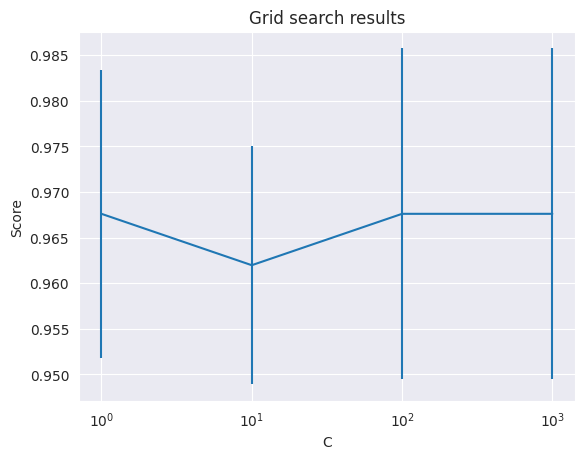

In [234]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [235]:
init = time.time()
optimal.fit(X_trainVowel, y_trainVowel)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testVowel, y_testVowel)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score -> 0.9963855421686747

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 1.0

Tiempo medio en ejecutarse el método: 0.0075272142887115485 +- 0.003600847945973966s
Tiempo en ejecutarse la búsqueda 0.1673140525817871s, (0.0027885675430297852 min)


<AxesSubplot: >

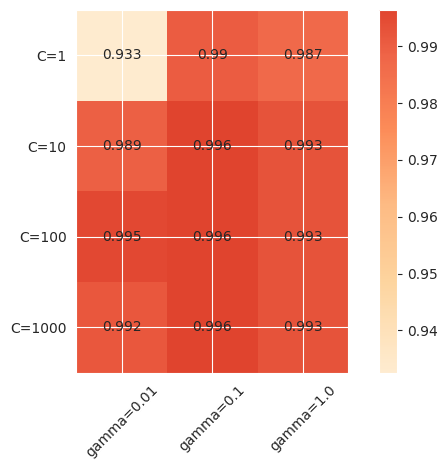

In [236]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

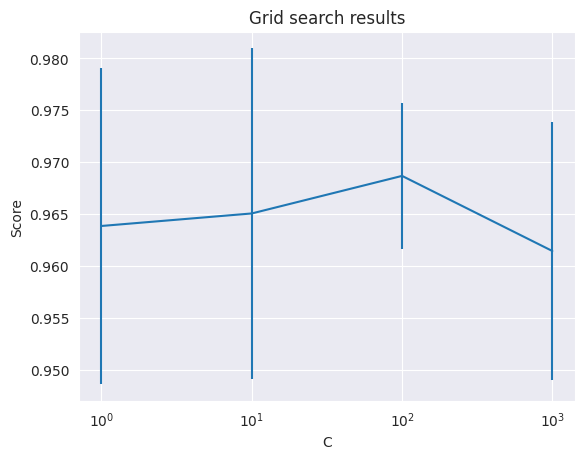

In [237]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [238]:
init = time.time()
optimal.fit(X_trainTae, y_trainTae)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testTae, y_testTae)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}
Best score -> 0.6153846153846153

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.48

Tiempo medio en ejecutarse el método: 0.28804150223732 +- 0.17463906892831585s
Tiempo en ejecutarse la búsqueda 9.376895189285278s, (0.15628158648808796 min)


<AxesSubplot: >

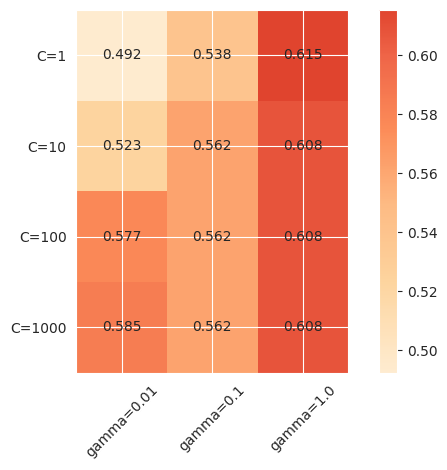

In [239]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

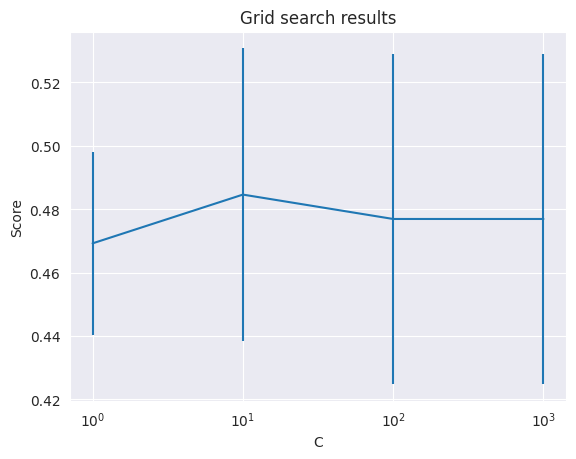

In [240]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [241]:
init = time.time()
optimal.fit(X_trainSonar, y_trainSonar)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testSonar, y_testSonar)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}
Best score -> 0.822857142857143

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.8260869565217391

Tiempo medio en ejecutarse el método: 0.002832275629043579 +- 0.0006375282515986233s
Tiempo en ejecutarse la búsqueda 0.08036446571350098s, (0.001339407761891683 min)


<AxesSubplot: >

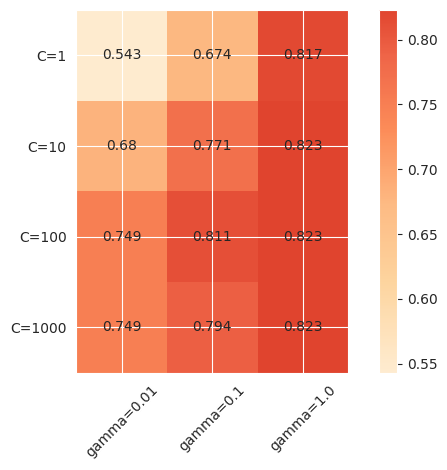

In [242]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

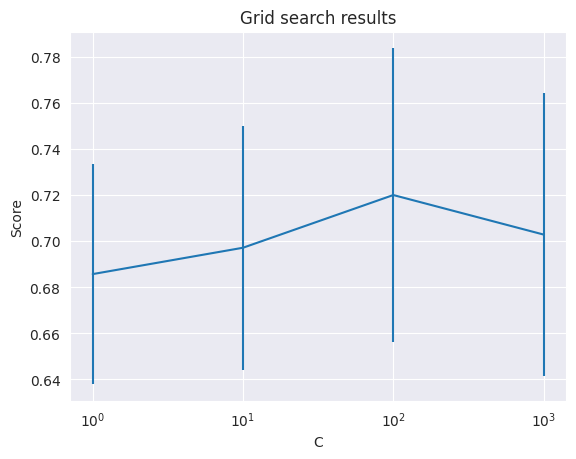

In [243]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [244]:
#TODO esta celda y las dos de abajo
init = time.time()
optimal.fit(X_trainSpambase, y_trainSpambase)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testSpambase, y_testSpambase)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

KeyboardInterrupt: 

In [ ]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

In [ ]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [245]:
init = time.time()
optimal.fit(X_trainPage, y_trainPage)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testPage, y_testPage)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best score -> 0.946782988004362

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.9490586932447398

Tiempo medio en ejecutarse el método: 133.91702387928962 +- 29.168883720276618s
Tiempo en ejecutarse la búsqueda 1090.3328413963318s, (18.172214023272197 min)


<AxesSubplot: >

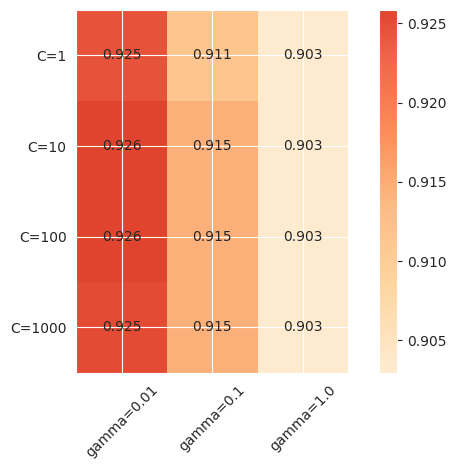

In [246]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

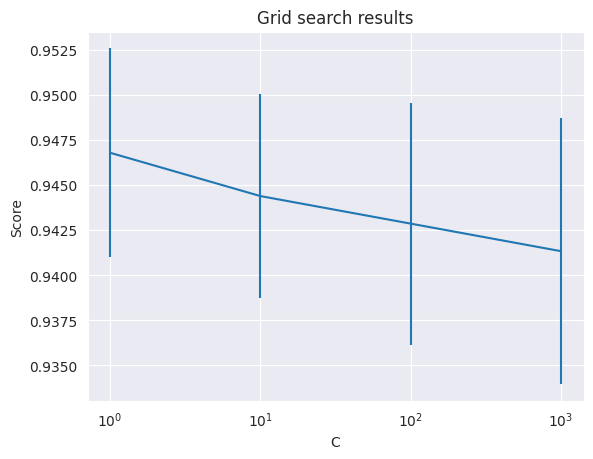

In [247]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [248]:
init = time.time()
optimal.fit(X_trainIris, y_trainIris)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testIris, y_testIris)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score -> 0.984

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.96

Tiempo medio en ejecutarse el método: 0.0031410932540893556 +- 0.0008234457413628373s
Tiempo en ejecutarse la búsqueda 1.2401208877563477s, (0.020668681462605795 min)


<AxesSubplot: >

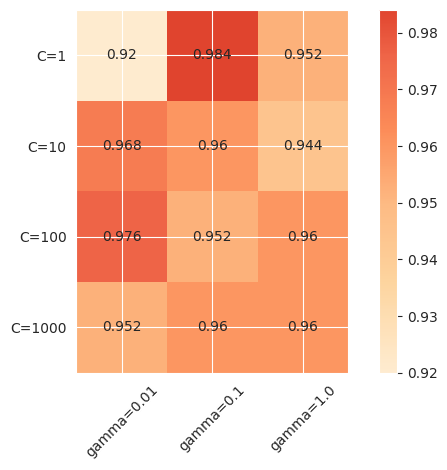

In [249]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

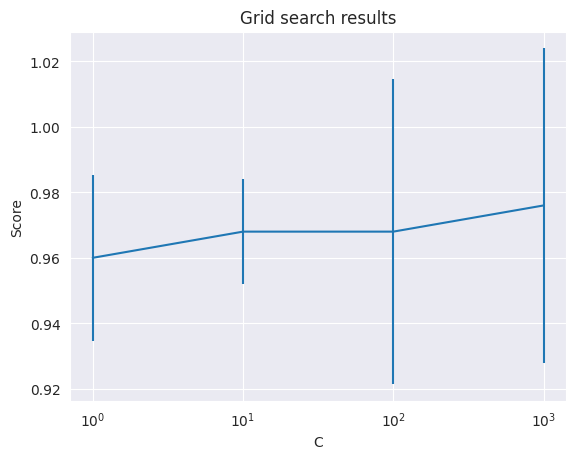

In [250]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [251]:
init = time.time()
optimal.fit(X_trainLetter, y_trainLetter)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testLetter, y_testLetter)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score -> 0.9616716417910448

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.9698484848484848

Tiempo medio en ejecutarse el método: 36.14621873497963 +- 2.3866269665666935s
Tiempo en ejecutarse la búsqueda 471.0139858722687s, (7.850233097871144 min)


<AxesSubplot: >

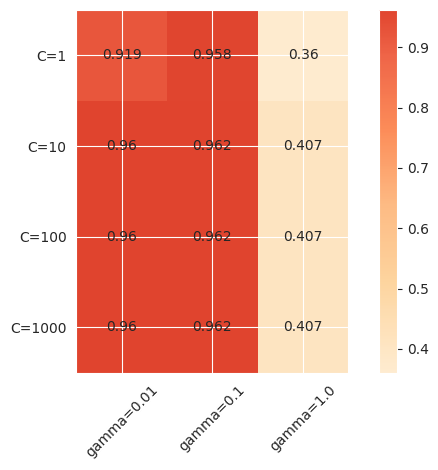

In [252]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

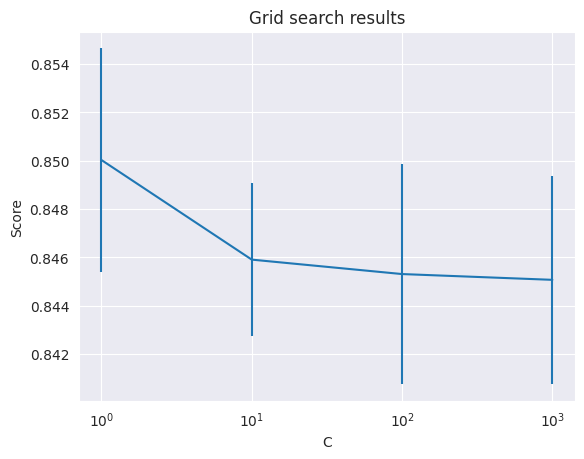

In [253]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')